In [70]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import sklearn.preprocessing
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import sem
from sklearn import preprocessing, linear_model, svm
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import KFold
from sklearn import metrics
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import norm, pareto, kstest
from statsmodels.graphics.gofplots import qqplot
import pandas.tseries

In [31]:
dataset = pd.read_csv('../data/all_data.csv')

In [32]:
# convert encoding
le = sklearn.preprocessing.LabelEncoder()
dataset['res_max_type'] = le.fit_transform(dataset['res_max_type'])

In [33]:
def splitToTrainTest(dataframe, trainPercent):
    recordNum = dataframe.shape[0]
    shuffledIndex = np.random.permutation(np.arange(recordNum))
    trainSetNum = int(recordNum * trainPercent)
    trainDf, testDf = dataframe.iloc[shuffledIndex[:trainSetNum]], dataframe.iloc[shuffledIndex[trainSetNum:]]
    return trainDf, testDf
train_df, test_df = splitToTrainTest(dataset, 0.7)

In [34]:
# ['count', 'type', 'avg_house_rent_price', 'avg_house_sell_price', 'lat', 'lon']
y_labels = ['LEVEL_MISDEMEANOR']#['Y']
irrelevant_labels = ['lat', 'lon', 'date', 'time', 'zipcode', 'LEVEL_FELONY', 'LEVEL_MISDEMEANOR', 'LEVEL_VIOLATION'] + y_labels

In [35]:
clf = DecisionTreeClassifier(criterion='entropy')
X_train, X_test = train_df.drop(irrelevant_labels, axis='columns'), test_df.drop(irrelevant_labels, axis='columns') 
y_train, y_test = train_df[y_labels], test_df[y_labels]
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Text(0,0.5,'Normalized Gini Importance')

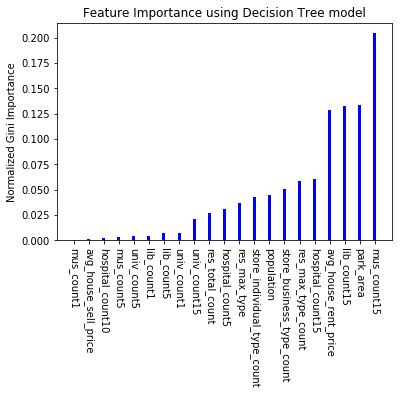

In [36]:
new_df = pd.DataFrame({'importance':clf.feature_importances_, 'feature':X_train.columns.values})
new_df.sort_values('importance', axis = 0, inplace = True)
fig, ax = plt.subplots()
ax.bar(np.arange(len(new_df['importance'].values)), new_df['importance'].values, width = 0.2, color='b')
ax.set_xticks(np.arange(len(new_df['importance'].values)))
ax.set_xticklabels(new_df['feature'].values, rotation=-90)
plt.title('Feature Importance using Decision Tree model')
ax.set_ylabel('Normalized Gini Importance')

In [37]:
train_df[[col_name for col_name in train_df.columns if col_name not in irrelevant_labels] + y_labels].corr()

,res_max_type,res_max_type_count,res_total_count,avg_house_sell_price,avg_house_rent_price,lib_count1,lib_count5,lib_count15,mus_count1,mus_count5,...,store_individual_type_count,univ_count1,univ_count5,univ_count15,population,hospital_count5,hospital_count10,hospital_count15,park_area,LEVEL_MISDEMEANOR
res_max_type,1.000000,0.509871,0.526663,0.295487,0.397882,-0.013789,-0.134442,-0.227652,0.218723,0.258708,...,0.100920,0.263417,0.288320,0.243875,0.113717,0.024594,-0.012314,-0.017168,-0.036019,0.014737
res_max_type_count,0.509871,1.000000,0.942933,0.303901,0.580083,-0.030676,-0.224380,-0.376054,0.393914,0.403506,...,-0.030168,0.320354,0.338093,0.304510,0.027110,-0.062046,-0.111108,-0.137475,-0.059172,0.008395
res_total_count,0.526663,0.942933,1.000000,0.366627,0.573834,-0.021711,-0.161859,-0.305429,0.415270,0.434993,...,0.027158,0.325739,0.348799,0.321069,0.124739,0.001595,-0.059114,-0.084851,-0.012954,0.013296
avg_house_sell_price,0.295487,0.303901,0.366627,1.000000,0.283371,-0.128700,-0.185648,-0.261121,0.401301,0.490785,...,-0.226253,0.207305,0.333812,0.321304,-0.224143,-0.033930,-0.038272,-0.041967,-0.172842,0.012266
avg_house_rent_price,0.397882,0.580083,0.573834,0.283371,1.000000,-0.201892,-0.338293,-0.459926,0.495175,0.539841,...,-0.348961,0.466483,0.544986,0.608672,-0.233671,0.034467,0.024870,0.044695,-0.168501,0.014052
lib_count1,-0.013789,-0.030676,-0.021711,-0.128700,-0.201892,1.000000,0.594368,0.369963,0.026062,-0.083582,...,0.268908,-0.049139,-0.105284,-0.148681,0.360966,0.059119,0.018915,-0.013761,0.203393,-0.010526
lib_count5,-0.134442,-0.224380,-0.161859,-0.185648,-0.338293,0.594368,1.000000,0.783389,-0.230276,-0.236719,...,0.335784,-0.088476,-0.061817,-0.146845,0.509047,0.286876,0.284489,0.248353,0.216482,-0.006063
lib_count15,-0.227652,-0.376054,-0.305429,-0.261121,-0.459926,0.369963,0.783389,1.000000,-0.308686,-0.305353,...,0.366203,-0.161175,-0.127496,-0.114214,0.516415,0.238247,0.295762,0.298841,0.158787,0.003769
mus_count1,0.218723,0.393914,0.415270,0.401301,0.495175,0.026062,-0.230276,-0.308686,1.000000,0.830968,...,-0.231138,0.388187,0.422929,0.474830,-0.197265,-0.116102,-0.119247,-0.113420,-0.130808,0.012133
mus_count5,0.258708,0.403506,0.434993,0.490785,0.539841,-0.083582,-0.236719,-0.305353,0.830968,1.000000,...,-0.311885,0.426538,0.583416,0.633525,-0.265326,-0.120353,-0.105770,-0.089344,-0.182110,0.019815


In [38]:
train_predict = clf.predict(X_train)
test_predict = clf.predict(X_test)
train_accuracy = metrics.accuracy_score(train_predict, y_train)
test_accuracy = metrics.accuracy_score(test_predict, y_test)

print('Train accuracy = {}\nTest accuracy = {}'.format(train_accuracy, test_accuracy))

Train accuracy = 0.5587619827464992
Test accuracy = 0.5555426895167516


In [39]:
# svm
def plotROC(classifiers, classifier_names, X_train, y_train, X_test, y_test):
    plt.figure()
    for classifier, classifier_name in zip(classifiers, classifier_names):
        # Learn to predict
        y_score = classifier.fit(X_train, y_train).decision_function(X_test)

        # Compute ROC curve and ROC area
        fpr, tpr, threshold = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
    
        # Plot
        lw = 2
        rand_color = np.random.rand(3,)
        plt.plot(fpr, tpr, c=rand_color,
                 lw=lw, label='%s ROC curve (area = %0.2f)' % (classifier_name, roc_auc))

    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

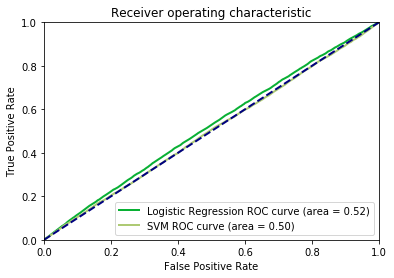

In [40]:
# build model

# logistic regression model
logistic_regression_model = linear_model.LogisticRegression(C = 1e30)

sampled_train = train_df.sample(40000)
sampled_X_train = sampled_train.drop(irrelevant_labels, axis='columns')
sampled_y_train = sampled_train[y_labels]
data_train = {'X': preprocessing.scale(sampled_X_train), 'y': np.asarray(sampled_y_train.values.ravel(), dtype=np.int)}
data_test = {'X':preprocessing.scale(X_test), 'y':np.asarray(y_test.values.ravel(), dtype=np.int)}

# svm model
svm_model = svm.SVC(kernel = 'linear')


# plot roc curve for logistic regression model and svm model
plotROC([logistic_regression_model, svm_model], ['Logistic Regression', 'SVM'],\
        data_train['X'], data_train['y'], data_test['X'], data_test['y'])

In [80]:

new_dataset = dataset.copy()
new_dataset['Y'] = new_dataset['LEVEL_FELONY']+new_dataset['LEVEL_MISDEMEANOR']*2+new_dataset['LEVEL_VIOLATION']*4

In [81]:
new_dataset.groupby('Y').size()

Y
1    104370
2    190937
4     50131
dtype: int64

In [30]:
raw_crime_data = pd.read_csv('../new_data/NYPD_Complaint_Data_Current_YTD.csv')

,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,160932883,09/30/2017,23:46:00,NaN,NaN,09/30/2017,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,28.0,OUTSIDE,NaN,NaN,NaN,997960.0,231127.0,40.801064,-73.950482,"(40.801063787, -73.950481913)"
1,491504201,09/30/2017,23:20:00,09/30/2017,23:35:00,09/30/2017,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,76.0,FRONT OF,STREET,NaN,NaN,982476.0,186071.0,40.677407,-74.006397,"(40.677406703, -74.006397124)"
2,670710700,09/30/2017,23:20:00,09/30/2017,23:25:00,09/30/2017,347,INTOXICATED & IMPAIRED DRIVING,905.0,"INTOXICATED DRIVING,ALCOHOL",...,121.0,NaN,STREET,NaN,NaN,942825.0,166367.0,40.623227,-74.149227,"(40.623226819, -74.149226973)"
3,316507505,09/30/2017,23:20:00,NaN,NaN,09/30/2017,578,HARRASSMENT 2,638.0,"HARASSMENT,SUBD 3,4,5",...,73.0,INSIDE,CHAIN STORE,NaN,NaN,1009882.0,177811.0,40.654698,-73.907624,"(40.654697919, -73.907623603)"
4,942412568,09/30/2017,23:15:00,09/30/2017,23:15:00,09/30/2017,105,ROBBERY,384.0,"ROBBERY,POCKETBOOK/CARRIED BAG",...,110.0,FRONT OF,STREET,NaN,NaN,1016026.0,211627.0,40.747495,-73.885321,"(40.747494938, -73.885321074)"
5,207887383,09/30/2017,23:10:00,09/30/2017,23:12:00,09/30/2017,235,DANGEROUS DRUGS,567.0,"MARIJUANA, POSSESSION 4 & 5",...,43.0,REAR OF,RESIDENCE - PUBLIC HOUSING,NaN,SACK WERN,1021993.0,238126.0,40.820204,-73.863637,"(40.820204108, -73.863637182)"
6,914858070,09/30/2017,23:10:00,09/30/2017,23:18:00,09/30/2017,105,ROBBERY,390.0,"ROBBERY,HOME INVASION",...,114.0,INSIDE,RESIDENCE - APT. HOUSE,NaN,NaN,1002768.0,220102.0,40.770794,-73.933146,"(40.770794342, -73.933146158)"
7,646012974,09/30/2017,23:09:00,NaN,NaN,09/30/2017,235,DANGEROUS DRUGS,511.0,"CONTROLLED SUBSTANCE, POSSESSI",...,103.0,NaN,STREET,NaN,NaN,1039125.0,192380.0,40.694554,-73.802113,"(40.694553524, -73.80211335)"
8,690078111,09/30/2017,23:05:00,09/30/2017,23:22:00,09/30/2017,106,FELONY ASSAULT,109.0,"ASSAULT 2,1,UNCLASSIFIED",...,106.0,FRONT OF,STREET,NaN,NaN,1032780.0,186007.0,40.677098,-73.825040,"(40.677098195, -73.82504028)"
9,269331366,09/30/2017,23:02:00,09/30/2017,23:05:00,09/30/2017,341,PETIT LARCENY,333.0,"LARCENY,PETIT FROM STORE-SHOPL",...,14.0,INSIDE,CHAIN STORE,NaN,NaN,988050.0,214940.0,40.756645,-73.986285,"(40.756644557, -73.986285275)"


In [65]:
raw_crime_data = pd.read_csv('../new_data/NYPD_Complaint_Data_Current_YTD.csv')
raw_crime_data[['CMPLNT_FR_DT', 'CMPLNT_FR_TM','Latitude', 'Longitude', 'LAW_CAT_CD', 'CRM_ATPT_CPTD_CD']]\
                        .dropna()\
                        .groupby(['LAW_CAT_CD', 'CRM_ATPT_CPTD_CD']).size()

LAW_CAT_CD   CRM_ATPT_CPTD_CD
FELONY       ATTEMPTED             3786
             COMPLETED           100584
MISDEMEANOR  ATTEMPTED             1786
             COMPLETED           189151
VIOLATION    ATTEMPTED              127
             COMPLETED            50004
dtype: int64

In [66]:
raw_crime_data.head(10).T

,0,1,2,3,4,5,6,7,8,9
CMPLNT_NUM,160932883,491504201,670710700,316507505,942412568,207887383,914858070,646012974,690078111,269331366
CMPLNT_FR_DT,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017
CMPLNT_FR_TM,23:46:00,23:20:00,23:20:00,23:20:00,23:15:00,23:10:00,23:10:00,23:09:00,23:05:00,23:02:00
CMPLNT_TO_DT,NaN,09/30/2017,09/30/2017,NaN,09/30/2017,09/30/2017,09/30/2017,NaN,09/30/2017,09/30/2017
CMPLNT_TO_TM,NaN,23:35:00,23:25:00,NaN,23:15:00,23:12:00,23:18:00,NaN,23:22:00,23:05:00
RPT_DT,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017,09/30/2017
KY_CD,101,344,347,578,105,235,105,235,106,341
OFNS_DESC,MURDER & NON-NEGL. MANSLAUGHTER,ASSAULT 3 & RELATED OFFENSES,INTOXICATED & IMPAIRED DRIVING,HARRASSMENT 2,ROBBERY,DANGEROUS DRUGS,ROBBERY,DANGEROUS DRUGS,FELONY ASSAULT,PETIT LARCENY
PD_CD,NaN,101,905,638,384,567,390,511,109,333
PD_DESC,NaN,ASSAULT 3,"INTOXICATED DRIVING,ALCOHOL","HARASSMENT,SUBD 3,4,5","ROBBERY,POCKETBOOK/CARRIED BAG","MARIJUANA, POSSESSION 4 & 5","ROBBERY,HOME INVASION","CONTROLLED SUBSTANCE, POSSESSI","ASSAULT 2,1,UNCLASSIFIED","LARCENY,PETIT FROM STORE-SHOPL"


CMPLNT_FR_DT
01/01/1971      3
01/01/1973      1
01/01/1975      1
01/01/1978      1
01/01/1979      2
01/01/1981      2
01/01/1984      1
01/01/1986      1
01/01/1987      1
01/01/1990      1
01/01/1992      1
01/01/1993      1
01/01/1996      2
01/01/1998      2
01/01/1999      2
01/01/2001      4
01/01/2002      3
01/01/2003      3
01/01/2004      6
01/01/2005      3
01/01/2006     15
01/01/2007      5
01/01/2008      9
01/01/2009     10
01/01/2010     16
01/01/2011     18
01/01/2012     19
01/01/2013     24
01/01/2014     20
01/01/2015     43
             ... 
12/22/2015      4
12/22/2016    124
12/23/2014      1
12/23/2015      3
12/23/2016    148
12/24/2014      1
12/24/2016    102
12/25/2012      1
12/25/2015      1
12/25/2016     88
12/26/2012      2
12/26/2014      3
12/26/2015      1
12/26/2016    109
12/27/2015      1
12/27/2016    146
12/28/2012      1
12/28/2015      1
12/28/2016    191
12/29/2015      2
12/29/2016    179
12/30/2013      2
12/30/2014      2
12/30/2015     

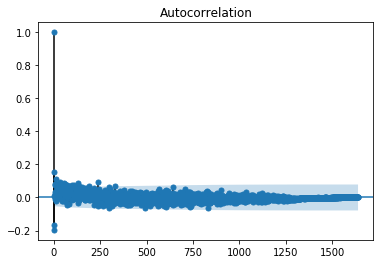

array([ 1.        , -0.19639618, -0.1655799 ,  0.00586295,  0.15394437,
        0.07567221,  0.03378799, -0.00649659,  0.08024847,  0.0194696 ,
        0.08047281,  0.00465602,  0.07181059, -0.01980267,  0.11083427,
        0.03914215,  0.00761313,  0.03608497,  0.04614281,  0.04752709,
        0.06551047,  0.01707124,  0.00541903,  0.05998683,  0.04154045,
        0.00815091,  0.0677394 ,  0.04941866,  0.02903561,  0.00900866,
        0.05555508,  0.07940152,  0.01457351, -0.00141309,  0.04241213,
        0.09087688,  0.00572589, -0.00681413,  0.0412672 ,  0.04687626,
        0.02688071])

In [71]:
timeSeries = raw_crime_data.groupby(['CMPLNT_FR_DT']).size()
plot_acf(timeSeries)
plt.show()
acf(timeSeries)

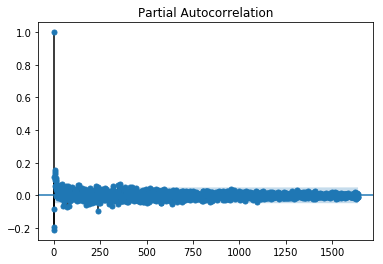

array([ 1.        , -0.19651608, -0.21261152, -0.08215651,  0.110982  ,
        0.1422263 ,  0.15506834,  0.09624408,  0.1289541 ,  0.0566604 ,
        0.107049  ,  0.04133734,  0.0882381 , -0.00691015,  0.09594221,
        0.06246254,  0.02901366,  0.04496594,  0.0200547 ,  0.03536351,
        0.05840555,  0.04247946, -0.00644979,  0.0338749 ,  0.00321921,
       -0.01387233,  0.03718213,  0.04661086,  0.0373511 ,  0.00584269,
        0.03430279,  0.06369292,  0.02742326, -0.00197517, -0.00194155,
        0.04720052,  0.00192811, -0.02234943, -0.01552239, -0.0104547 ,
       -0.01866257])

In [72]:
plot_pacf(timeSeries)
plt.show()
pacf(timeSeries)

In [73]:
min_samples_split_values = np.logspace(1, 20, num=10, base=2).astype(np.int)
min_samples_leaf_values = np.logspace(1, 20, num=10, base=2).astype(np.int)

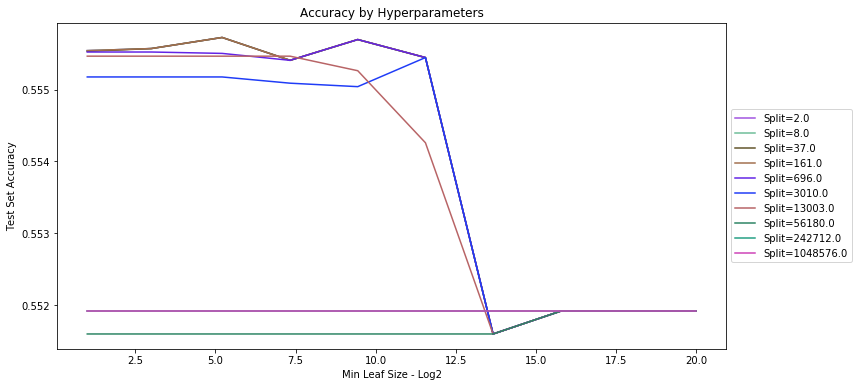

In [77]:
def getAccuracy(train, test, min_samples_split_value, min_samples_leaf_value):
    treeModel = DecisionTreeClassifier(criterion='entropy', min_samples_split = min_samples_split_value, min_samples_leaf = min_samples_leaf_value)
    
    treeModel.fit(train['X'], train['y'])
    testPredict = treeModel.predict(test['X'])
    
    return metrics.accuracy_score(testPredict, test['y'])
    
 
res = {}
for min_samples_split_value in min_samples_split_values:
    res[min_samples_split_value] = []

for min_samples_split_value in min_samples_split_values:
    for min_samples_leaf_value in min_samples_leaf_values:
        res[min_samples_split_value].append(getAccuracy({'X':X_train, 'y':y_train}, {'X':X_test, 'y':y_test}, min_samples_split_value, min_samples_leaf_value))
fig = plt.figure(figsize = (15, 6))
ax = fig.add_subplot(111)

for min_samples_split_value in min_samples_split_values:
    plt.plot(np.log2(min_samples_leaf_values), res[min_samples_split_value], 
             color=(np.random.rand(),np.random.rand(),np.random.rand()), label='Split={}'.format(np.floor(min_samples_split_value)))

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel('Min Leaf Size - Log2')
ax.set_ylabel('Test Set Accuracy')
plt.title('Accuracy by Hyperparameters')    
plt.show()

In [143]:
crime_count = new_dataset.groupby(['date', 'Y']).size().reset_index().rename(index=int, columns={0:'crime_count'})

In [144]:
crime_count

,date,Y,crime_count
0,01/01/1990,2,1
1,01/01/1996,1,1
2,01/01/1998,2,1
3,01/01/2001,1,3
4,01/01/2002,1,1
5,01/01/2002,4,1
6,01/01/2003,2,1
7,01/01/2004,1,2
8,01/01/2004,2,1
9,01/01/2005,2,1


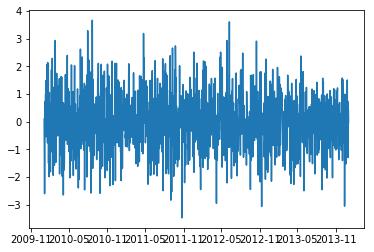

In [145]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd


a = pd.DatetimeIndex(start='2010-01-01',end='2014-01-01' , freq='D')
b = pd.Series(np.random.randn(len(a)), index=a)
fig, ax = plt.subplots()
ax.plot(b.index, b)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

0       01/01/1990
1       01/01/1996
2       01/01/1998
3       01/01/2001
4       01/01/2002
5       01/01/2002
6       01/01/2003
7       01/01/2004
8       01/01/2004
9       01/01/2005
10      01/01/2006
11      01/01/2007
12      01/01/2009
13      01/01/2009
14      01/01/2010
15      01/01/2011
16      01/01/2012
17      01/01/2012
18      01/01/2013
19      01/01/2013
20      01/01/2014
21      01/01/2014
22      01/01/2014
23      01/01/2015
24      01/01/2015
25      01/01/2015
26      01/01/2016
27      01/01/2016
28      01/01/2016
29      01/01/2017
           ...    
2712    12/26/2016
2713    12/27/2016
2714    12/27/2016
2715    12/27/2016
2716    12/28/2012
2717    12/28/2015
2718    12/28/2016
2719    12/28/2016
2720    12/28/2016
2721    12/29/2015
2722    12/29/2016
2723    12/29/2016
2724    12/29/2016
2725    12/30/2013
2726    12/30/2013
2727    12/30/2014
2728    12/30/2015
2729    12/30/2015
2730    12/30/2016
2731    12/30/2016
2732    12/30/2016
2733    12/3

In [151]:
test = crime_count.loc[crime_count['Y'] == 1].drop('Y', axis='columns').set_index('date')

ValueError: labels ['date'] not contained in axis

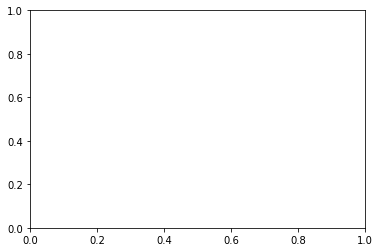

In [157]:
fig, ax = plt.subplots()
test.index = pd.to_datetime(test.index, errors='ignore', format='%m/%d/%Y')
ax.plot(test.index, test.reset_index().drop(['date'], axis='columns'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))